# Line bands

The second input in a $\mathrm{LiMe}$ measurement is the line bands. These are the intervals that include the line itself along with two adjacent, featureless continua. This design was inspired by the Lick indices described in [Worthey et al. (1993) and references therein](https://ui.adsabs.harvard.edu/abs/1994ApJS...94..687W/abstract). The image below shows an example with the bands for the $[NeIII]3869\ \text{\AA}$ line:

<img src="../0_resources/images/bands_definition.png" width="1200" />

A band consists in a 6-value array $(w_{1},.. w_{6})$ with the wavelength boundaries for the line location and two adjacent continua.

<div class="alert alert-success" role="alert">

**Remember:**

* The wavelength array must be sorted from lower to higher values.  
* The wavelength values are in the rest frame.  
* The wavelength units are the same as those declared in the target $\tt{lime.Spectrum}$ or $\tt{lime.Cube}$ observations.  

</div>

The central band limits provide the following information:  

* The location of the line. These are the pixels used to compute the integrated flux and fit the profile.  
* By default, $\mathrm{LiMe}$ uses these band limits to compute the linear continuum of the line.  

The adjacent bands must be featureless and located before and after the line region. They provide the following information:  

* If the user’s observation does not include flux uncertainties, $\mathrm{LiMe}$ will use these bands to assign a constant pixel uncertainty for the line measurements.  
* The user can also choose to use these bands to compute the linear continuum for the line measurements.  

## Default line bands

$LiMe$ includes a [lines database](../2_guides/0_lines_database.ipynb) where you can find the default labels and bands. The band limits can be found in the ```w1, w2, w3, w4, w5``` and ```w6``` columns.

In [1]:
import lime
from pathlib import Path
from lime.fitting.lines import c_KMpS

lines_db = lime.lines_frame()
lines_db.loc[['H1_4861A', 'H1_6563A'], ['w1', 'w2', 'w3', 'w4', 'w5', 'w6']]

/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/vital/anaconda3/envs/lime2/lib/python3.12/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,w1,w2,w3,w4,w5,w6
H1_4861A,4809.80,4836.10,4854.763846,4867.736154,4883.13,4908.40
H1_6563A,6480.03,6520.66,6553.943676,6571.456324,6627.70,6661.82


By default these values are in Angstroms but you can change the units using [line database configuraiton commands](../2_guides/0_lines_database.ipynb). 

## Object line bands

Your first step in the analysis of an observation is to generate a template with candidate lines. The default database includes many transitions from the UV to the FIR. However, you can restrict the database to your data’s wavelength range using the $\tt{lime.Spectrum.retrieve.lines\_frame}$ function:

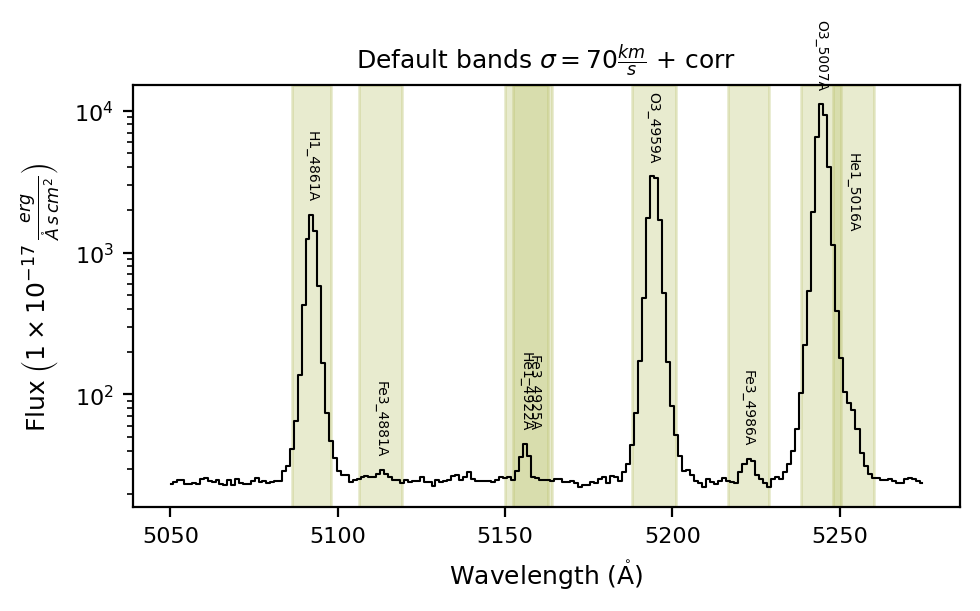

In [2]:
import lime
from pathlib import Path

# Create the observations
data_folder = Path('../0_resources/spectra')
sloan_SHOC579 = data_folder/'sdss_dr18_0358-51818-0504.fits'
spec = lime.Spectrum.from_file(sloan_SHOC579, instrument='sdss', redshift=0.0475, crop_waves=(5050, 5275))

# Adjust the default lines database to the observation wavelength range and resolving power
lines_df = spec.retrieve.lines_frame(band_vsigma=70, n_sigma=4, instrumental_correction=True)

# Plot the bands over the observation
spec.plot.spectrum(bands=lines_df, log_scale=True, ax_cfg={'title': r'Default bands $\sigma=70\frac{km}{s}$ + corr'})

The cell above includes the main arguments for the $\tt{lime.Spectrum.retrieve.lines\_frame}$ function with their default values:

* ```band_vsigma=70``` – The central band velocity dispersion in km/s.  
* ```n_sigma=4``` – The number of sigmas to consider for the band width (this value is multiplied by 2 to account for both the blue and red sides).  
* ```instrumental_correction=True``` – Apply the observation’s resolving power correction (or the pixel width if not available) to increase the band width.  


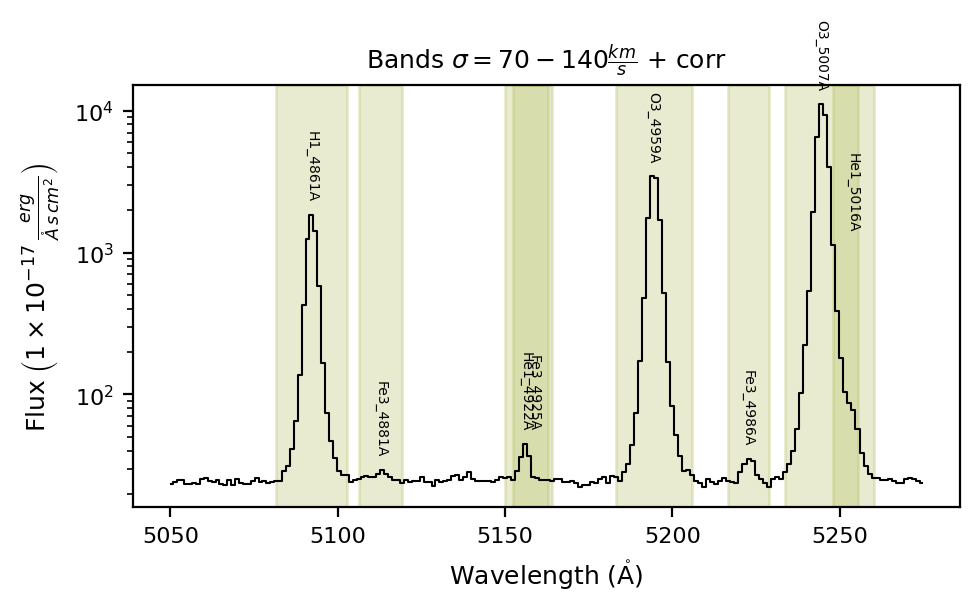

In [3]:
# Dictionary with the lines with a unique band_vsigma value in km/s
vsigma_dict = {'H1_4861A': 140, 'H1_6563A': 140,  'O3_4959A': 140, 'O3_5007A': 140} 

# Adjust the default lines database to the observation wavelength range and resolving power
lines_df = spec.retrieve.lines_frame(band_vsigma=70, n_sigma=4, instrumental_correction=True, map_band_vsigma=vsigma_dict)

# Plot the bands over the observation
spec.plot.spectrum(bands=lines_df, log_scale=True, ax_cfg={'title': r'Bands $\sigma=70 - 140\frac{km}{s}$ + corr'})

This is better but as you can see some bands contain multiple lines. In this case, we can provide blended and merged lines for the line measurement:

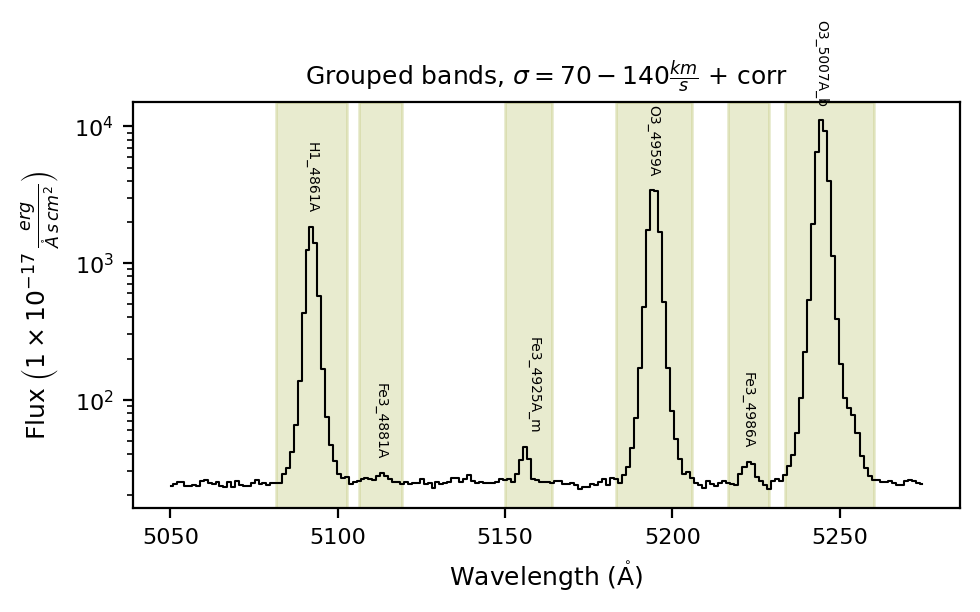

In [4]:
# Dictionary with the merged and blended components
vsigma_dict = {'H1_4861A': 140, 'H1_6563A': 140,  'O3_4959A': 140, 'O3_5007A': 140} 

# Dictionary with the lines with a unique band_vsigma value in km/s
line_groups_dict = {'Fe3_4925A_m': 'Fe3_4925A+He1_4922A',
                    'O3_5007A_b': 'O3_5007A+He1_5016A'}

# Adjust the default lines database to the observation wavelength range and resolving power
lines_df = spec.retrieve.lines_frame(band_vsigma=70, n_sigma=4, instrumental_correction=True, map_band_vsigma=vsigma_dict,
                                     fit_cfg=line_groups_dict)

# Plot the bands over the observation
spec.plot.spectrum(bands=lines_df, log_scale=True, ax_cfg={'title': r'Grouped bands, $\sigma=70 - 140\frac{km}{s}$ + corr'})

In the case you want the bands to be fixed at a constant width, you can set ```instrumental_correction=False``` :

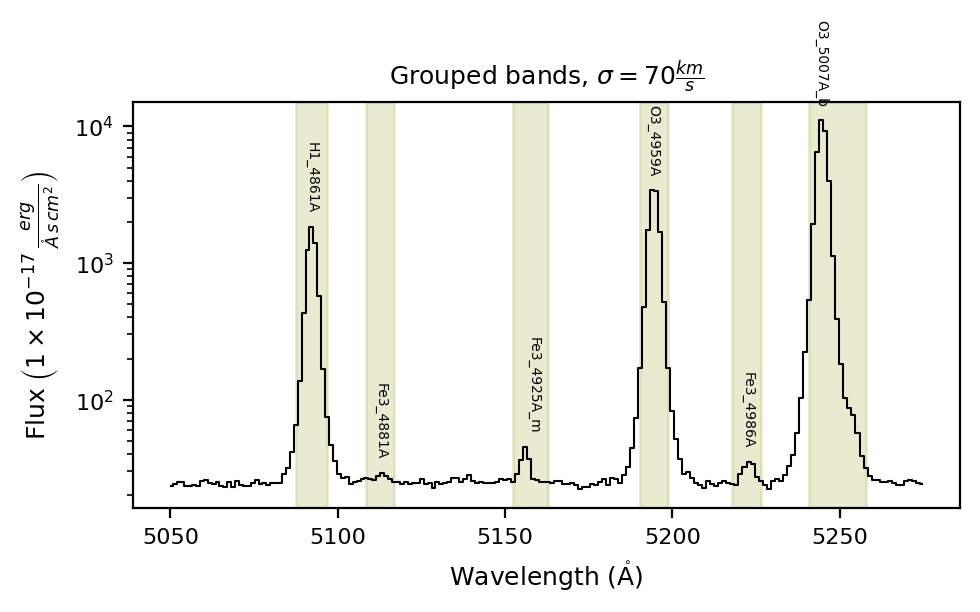

Bands sigma velocity times n_sigmas in km/s
H1_4861A        70.000000
Fe3_4881A       70.000000
Fe3_4925A_m     87.082789
O3_4959A        70.000000
Fe3_4986A       70.000000
O3_5007A_b     136.151426
dtype: float64


In [5]:
# Adjust the default lines database to the observation wavelength range and resolving power
band_vsigma, n_sigma = 70, 4
lines_df = spec.retrieve.lines_frame(band_vsigma=band_vsigma, n_sigma=n_sigma, instrumental_correction=False,
                                      fit_cfg=line_groups_dict)

# Plot the bands over the observation
spec.plot.spectrum(bands=lines_df, log_scale=True, ax_cfg={'title': r'Grouped bands, $\sigma=70\frac{km}{s}$'})

# Velocity bands velocity in Km/s
print('Bands sigma velocity times n_sigmas in km/s')
print(c_KMpS/(2 * n_sigma) * (lines_df['w4'] - lines_df['w3'])/lines_df['wavelength'])


<div class="alert alert-warning" role="alert">

**Please remember:** The current version of $\tt{lime.Spectrum.retrieve.lines\_frame}$ has limited options to adjust the adjacent bands continua. If you are going to use the continua bands for your calculations make sure to [adjust them manually](../2_guides/3_Manual_bands_adjustement.ipynb). 

</div>

## Takeaways

* You should always prepare a lines table in advance with the lines you expect and an appropriate band width.  
* You can adjust the default lines database using the $\tt{lime.Spectrum.retrieve.lines\_frame}$ function. Start with the most line-rich object for a given instrument to produce your template.  
* Check the [$\tt{lime.Spectrum.retrieve.lines\_frame}$ arguments](../4_references/API) to explore all the options available for preparing your lines table template.  
* In [this guide](../2_guides/3_Manual_bands_adjustement.ipynb), we explore how to adjust the line bands interactively.   